WQD7005 DATA MINING 

GROUP 1 

QUESTION 1 - CASE STUDY

TITLE: COVID-19 ICU REQUIREMENT PREDICTION - A KDD CASE STUDY

Knowledge Discovery in Database (KDD)

1. Import libraries

In [55]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

# Change working directory to script location
os.chdir(sys.path[0])

2. Data selection

In [56]:
# Load raw data
df = pd.read_csv('covid.csv', index_col=False)

# Show metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [57]:
# Encode 2 to 0 (No case) for easy interpret
df['icu'] = df['icu'].apply(lambda x: 0 if x == 2 else x)

<AxesSubplot:xlabel='icu'>

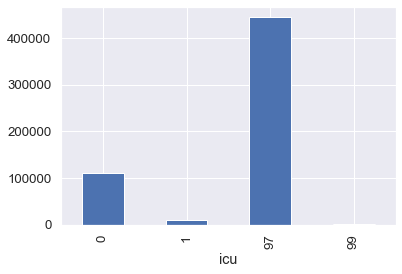

In [58]:
# Target variable frequency
df.groupby('icu').id.count().plot(kind='bar')

In [59]:
# Create Sample

# subset where patient is infected covid
df = df[(df['covid_res'] == 1)]

# subset where icu = 1 or 0
df = df[(df['icu'] == 1) | (df['icu'] == 0)]

# create balance class dataset
df = df.groupby('icu', group_keys=False).apply(lambda x: x.sample(5800))

# Create sample subset data file
# df.to_csv('covid_icu_subset.csv', index=False)

# Load the saved sample set
df = pd.read_csv('covid_icu_subset.csv', index_col=False)
len(df)

11600

2.2 EDA of subset

In [60]:
# Summarise numerical variables
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,11600.000000,11600.0,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.000000,11600.0,11600.000000
mean,1.640259,2.0,1.701897,1.235345,55.198621,62.884224,2.604138,2.767931,2.854052,2.858276,2.488448,3.134741,2.816724,2.652414,2.823534,2.781466,39.560603,1.0,0.500000
std,0.479945,0.0,0.457445,0.424232,16.706770,45.584941,9.388540,8.747373,9.138717,9.181913,8.919400,10.563094,9.055949,9.296778,9.099178,9.061005,47.435853,0.0,0.500022
min,1.000000,2.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000
25%,1.000000,2.0,1.000000,1.000000,45.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.000000
50%,2.000000,2.0,2.000000,1.000000,56.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,0.500000
75%,2.000000,2.0,2.000000,1.000000,67.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.0,1.000000
max,2.000000,2.0,2.000000,2.000000,103.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,1.0,1.000000


In [61]:
# Summarise object variables
df.describe(include=['O'])

,id,entry_date,date_symptoms,date_died
count,11600,11600,11600,11600
unique,11595,112,118,100
top,0.00E+00,15-06-2020,01-06-2020,9999-99-99
freq,5,230,279,6671


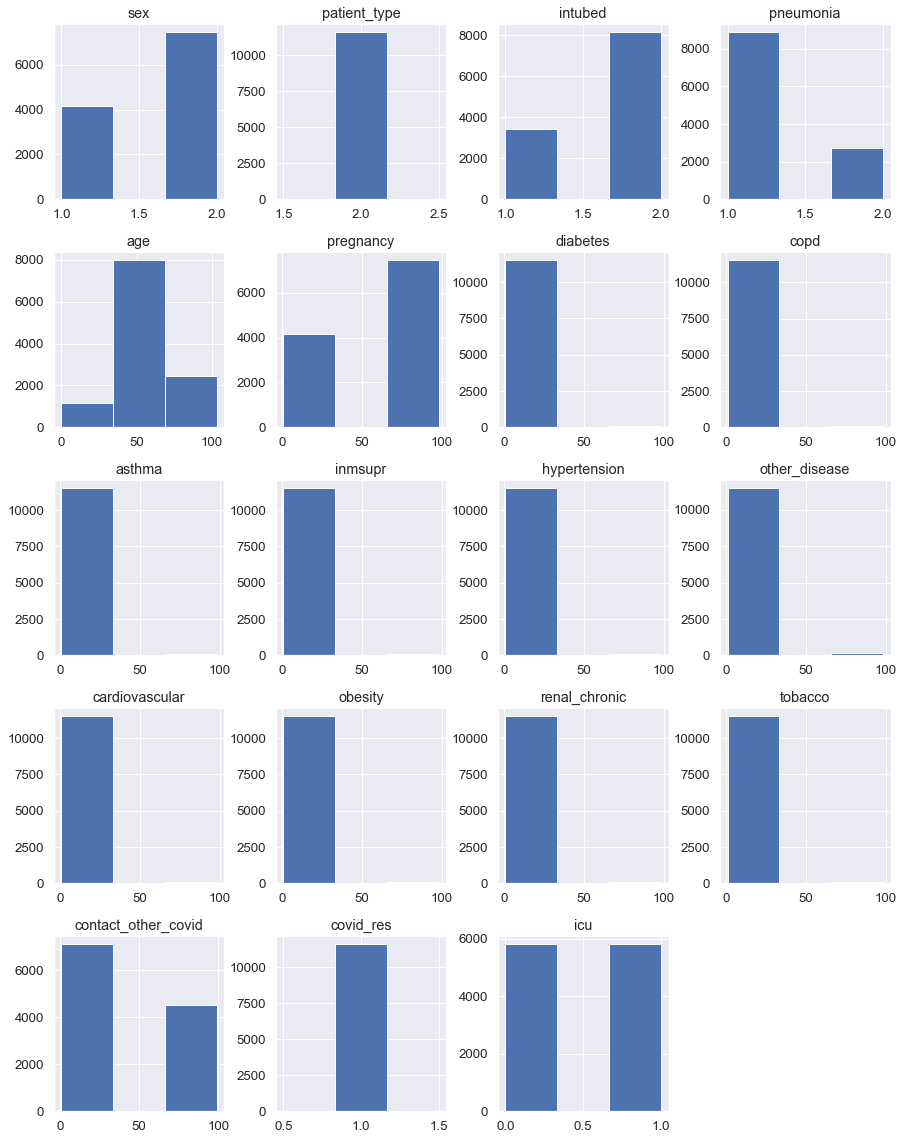

In [62]:
# Frequency histogram
# Missing values are encoded to 97,98,99
hist = df.hist(bins=3,figsize=(15,20))

<AxesSubplot:xlabel='icu'>

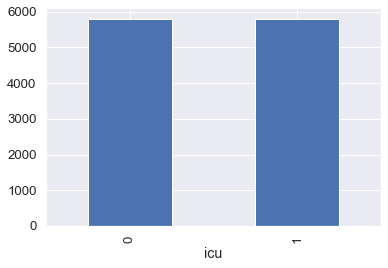

In [63]:
# Target variable frequency in sample
df.groupby('icu').id.count().plot(kind='bar')

3. Data cleaning and pre-processing

3.3 Outlier

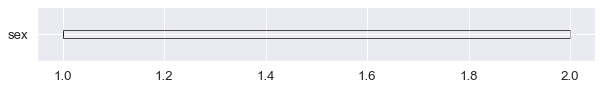

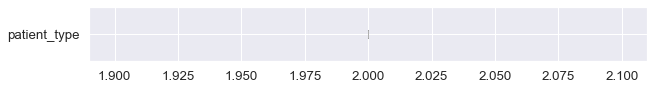

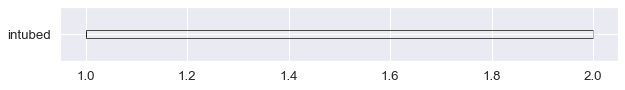

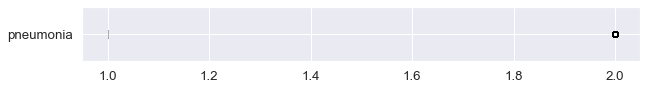

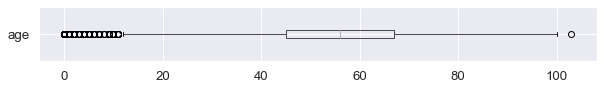

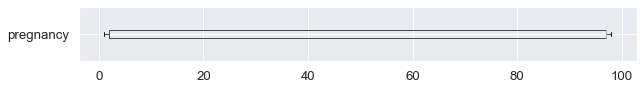

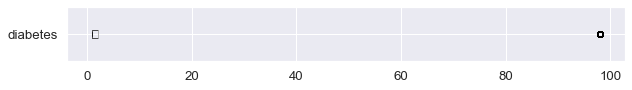

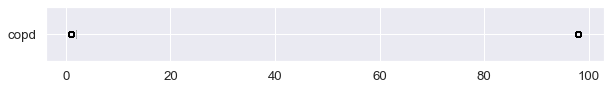

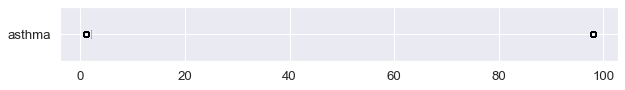

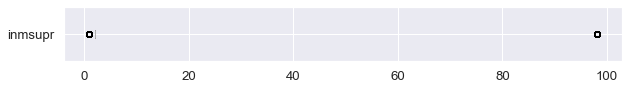

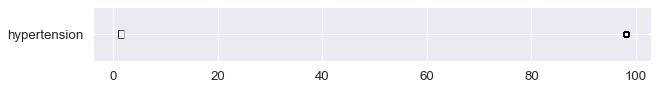

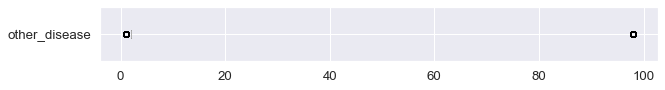

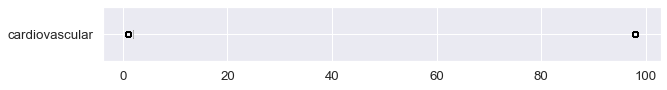

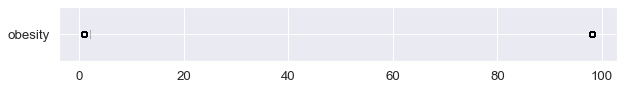

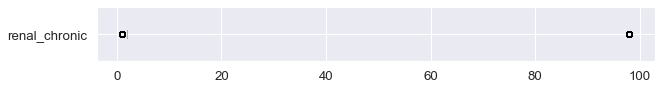

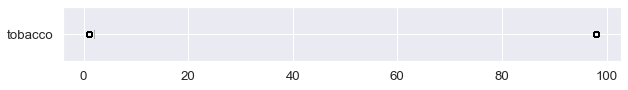

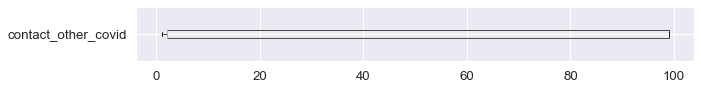

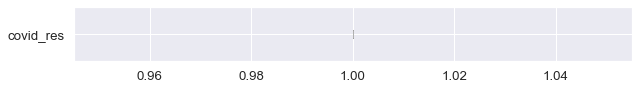

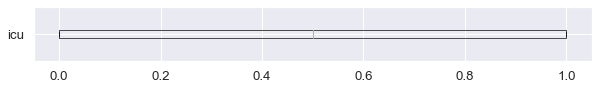

In [64]:
# Variable boxplot to spot outlier (validation purpose)
# Drop categorical variable
df_outlier = df.drop(['id','entry_date','date_symptoms','date_died'], axis = 1)
for column in df_outlier:
        plt.figure(figsize=(10,1))
        df_outlier.boxplot(column=column,vert=False)

<AxesSubplot:xlabel='icu'>

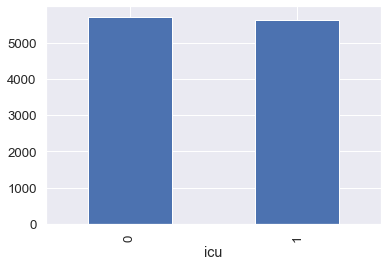

In [65]:
# Remove outlier
q_low = df['age'].quantile(0.01)
q_hi  = df['age'].quantile(0.99)
df = df[(df['age'] < q_hi) & (df['age'] > q_low)]

# Check target distribution
df.groupby(['icu']).id.count().plot(kind='bar')

3.2 Missing values

In [66]:
# Detecting missing value - will be zero 
# because the raw dataset encoded missing value to 97,98,99.
df.isna().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

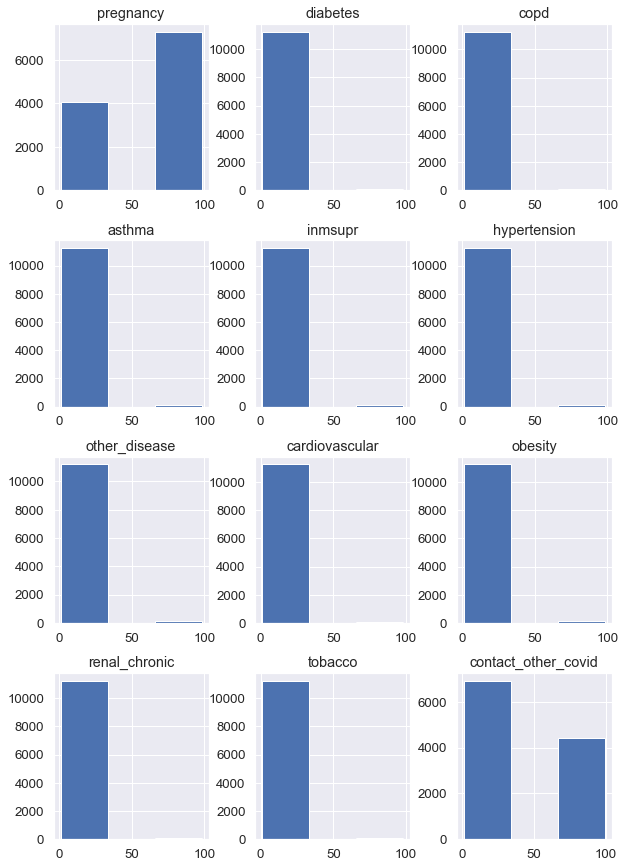

In [67]:
# Check each variable to see how many missing value using hist
# if not much will impute, if too much will drop the value
mv_cols = ['pregnancy','diabetes','copd','asthma','inmsupr','hypertension',
            'other_disease','cardiovascular','obesity','renal_chronic','tobacco','contact_other_covid']
df_mv = df[mv_cols]
hist = df_mv.hist(bins=3, figsize=(10,15))

In [68]:
# From above histogram can see 'pregnancy' and 'contact_other_covid' have too many missing values
# hence drop this two variable
df = df.drop(['pregnancy','contact_other_covid'], axis = 1)

In [69]:
# For other variables, since all are categorical, will impute with mode
mv_cols2 = ['diabetes','copd','asthma','inmsupr','hypertension','other_disease','cardiovascular','obesity','renal_chronic','tobacco']
for column in df[mv_cols2]:
        df[column] = df[column].replace([97,98,99],df[column].mode()[0])

4. Variable Selection

In [70]:
# Drop id or demographic variable
df = df.drop(['id','entry_date','date_symptoms','date_died'], axis = 1)

In [71]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create features and target
X = df.drop('icu', axis=1) # X contains only feature varibales
Y = df['icu'] # Y contains only target varibale

# Select 10 important variables 
selector = SelectKBest(score_func=chi2, k=10)
fit = selector.fit(X, Y)

# Show selected variable
cols = selector.get_support(indices=True)
df_feature_new = df.iloc[:,cols]
df_feature_new.columns

Index(['sex', 'intubed', 'pneumonia', 'age', 'diabetes', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco'],
      dtype='object')

5. Decision Tree

In [72]:
# Define plot function
def plot_performance_metric(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)
    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
    print('Confusion Matrix:')
    plt.figure(figsize = (4,2))
    # Plot the confussion matrix
    sns.set(font_scale=1.2) #for label size
    sns.heatmap(df_cm,annot=True,fmt='.0f',annot_kws={"size": 15})# font size
    plt.show()
    print('Classification Report: \n', classification_report(y_test,y_pred, digits=4))

In [73]:
# Split dataset in features and target variable
selected_feature = ['sex', 'intubed', 'pneumonia', 'age', 'diabetes', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco']
X = df[selected_feature]
y = df.icu

# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 


Default Decision Tree
Confusion Matrix:


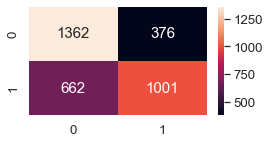

Classification Report: 
               precision    recall  f1-score   support

           0     0.6729    0.7837    0.7241      1738
           1     0.7269    0.6019    0.6586      1663

    accuracy                         0.6948      3401
   macro avg     0.6999    0.6928    0.6913      3401
weighted avg     0.6993    0.6948    0.6920      3401



In [74]:
# Build Decision Tree 1

# Train the Decision Tree classifer object
tree1 = DecisionTreeClassifier().fit(X_train, y_train)

# Classify the target for test dataset
y_pred = tree1.predict(X_test)

# Print performance metric
print('\nDefault Decision Tree')
plot_performance_metric(y_test, y_pred)


Optimised Decision Tree
Confusion Matrix:


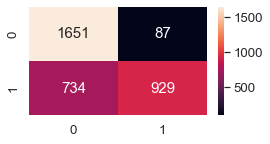

Classification Report: 
               precision    recall  f1-score   support

           0     0.6922    0.9499    0.8009      1738
           1     0.9144    0.5586    0.6935      1663

    accuracy                         0.7586      3401
   macro avg     0.8033    0.7543    0.7472      3401
weighted avg     0.8009    0.7586    0.7484      3401



In [75]:
# Build Decision Tree 2

# Train the Decision Tree classifer object
tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=3).fit(X_train, y_train)

# Classify the target for test dataset
y_pred = tree2.predict(X_test)

# Print performance metric
print('\nOptimised Decision Tree')
plot_performance_metric(y_test, y_pred)

6. Evaluation

c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


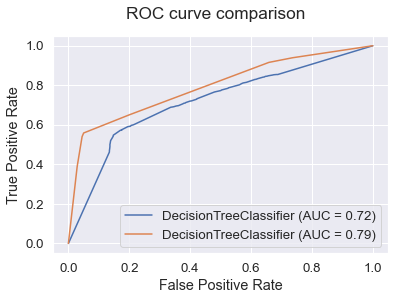

In [76]:
# Evaluate models using ROC
from sklearn.metrics import plot_roc_curve

m_disp = plot_roc_curve(tree1, X_test, y_test)
s_disp = plot_roc_curve(tree2, X_test, y_test, ax=m_disp.ax_)
s_disp.figure_.suptitle("ROC curve comparison")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

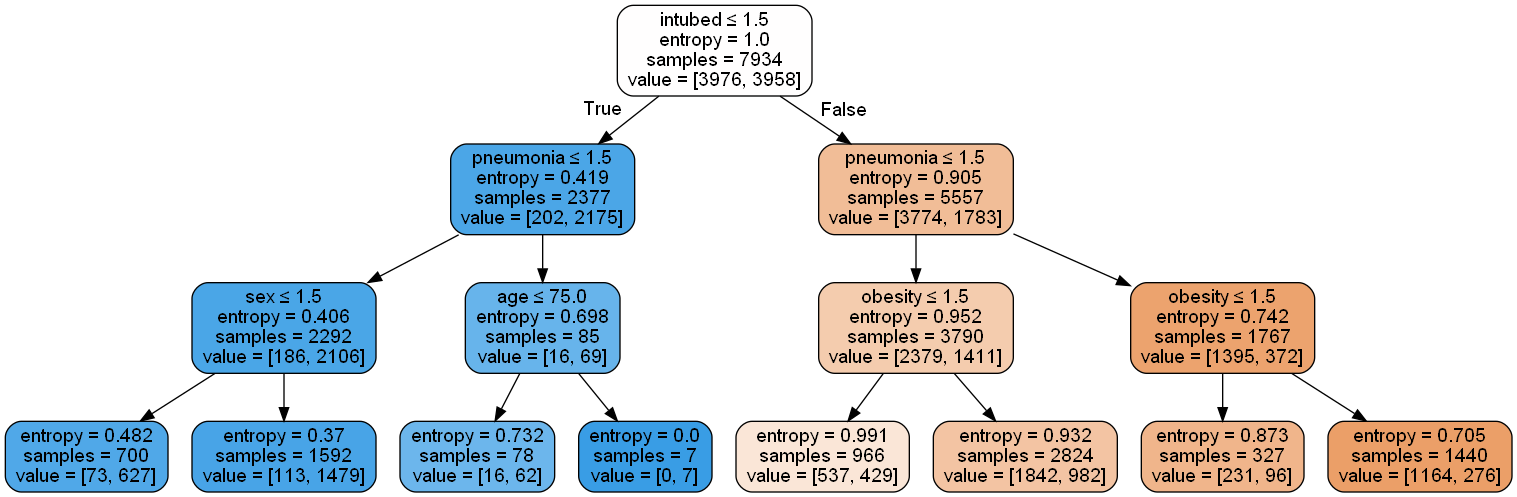

In [77]:
# Plot Optimised Decision Tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/user/Downloads/Compressed/Graphviz/bin/'

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = selected_feature)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('icu-optimised-tree.png')
Image(graph.create_png())